# Name: Jyoshika Barathimogan
# Purpose: SC1003 Mini Project
# Please attribute the author when using or modifying this code.


# Algorithm for Forming Diverse and Balanced Student Teams

The algorithm aims to form diverse and balanced teams from 6,000 student records across 120 different tutorial groups, based on the following criteria:

+ School Affiliation: Ensure teams have a mix of students from different schools to promote varied knowledge and skills, preventing a majority from any single school.
+ Gender: Maintain gender diversity within teams, avoiding a majority of students from the same gender.
+ CGPA: Distribute academic performance evenly across teams, avoiding teams dominated by students with either very high or very low CGPAs.
        
The objective is to create teams that are fair, diverse, and balanced, with some flexibility allowed if certain profiles or backgrounds are slightly dominant in specific teams.

The purpose of this algorithm is to assist in grouping students for a school application by forming teams from 6,000 student records across 120 tutorial groups. The algorithm aims to ensure that the teams are diverse and balanced by considering factors such as school affiliation, gender, and CGPA. This helps to create teams that promote fairness, equity, and collaboration among students, ensuring that no team is dominated by a particular school, gender, or academic performance, while encouraging a well-rounded and inclusive learning environment.

#### _______________________________________________________________________________________________________________________

# Basic Algorithm ⭐⭐⭐

#### _______________________________________________________________________________________________________________________

##### The objective is to form diverse and balanced teams by ensuring a mix of school affiliations, genders, and CGPA levels, only for a team of 5 stduents

#### _______________________________________________________________________________________________________________________

# Load Datset

#### _______________________________________________________________________________________________________________________

In [1]:
# Declare file path, change it accordingly.
file_path = 
output_file_path = 

In [2]:
# All packages that is used for this assignment
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import csv
import math
import random
import numpy as np
import pyfiglet

In [3]:
def load(file_path):
    
    data = []
    
    
    with open(file_path, 'r') as file:
        header = file.readline().strip().split(',')
        for line in file:
            row = line.strip().split(',')
            entry = {} 
            
            for i in range(len(header)): 
                entry[header[i]] = row[i] 
            data.append(entry)
            
    return data



# load the csv file
data = load(file_path)

#### _______________________________________________________________________________________________________________________

# Data Analysis

#### _______________________________________________________________________________________________________________________

## Comprehensive Data Analysis for All Tutorial Groups

### Gender Distribution

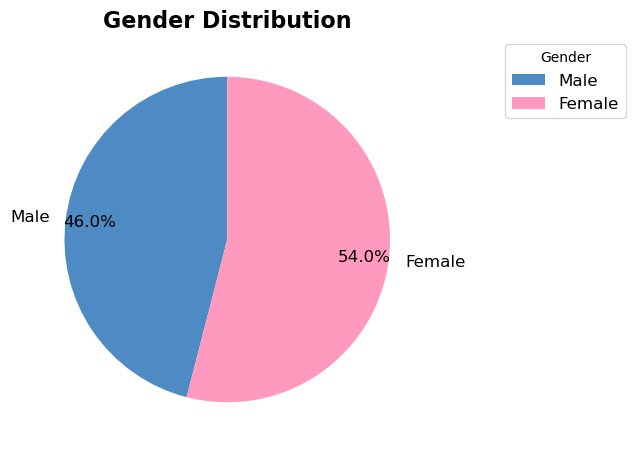

In [4]:
def gender_distribution_one(data):

    gender_counts = Counter([entry['Gender'] for entry in data])


    labels = list(gender_counts.keys())
    sizes = list(gender_counts.values())
    

    colors = ['#4E8BC4', '#FF99BE']
    

    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, 
        textprops={'fontsize': 12}, 
        pctdistance=0.85 )
    

    plt.legend(wedges, labels, title="Gender", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)


    plt.title('Gender Distribution', fontsize=16, fontweight='bold')
    plt.tight_layout()

    
    plt.show()


# calling the function
gender_distribution_one(data)

### School Affiliation Distribution

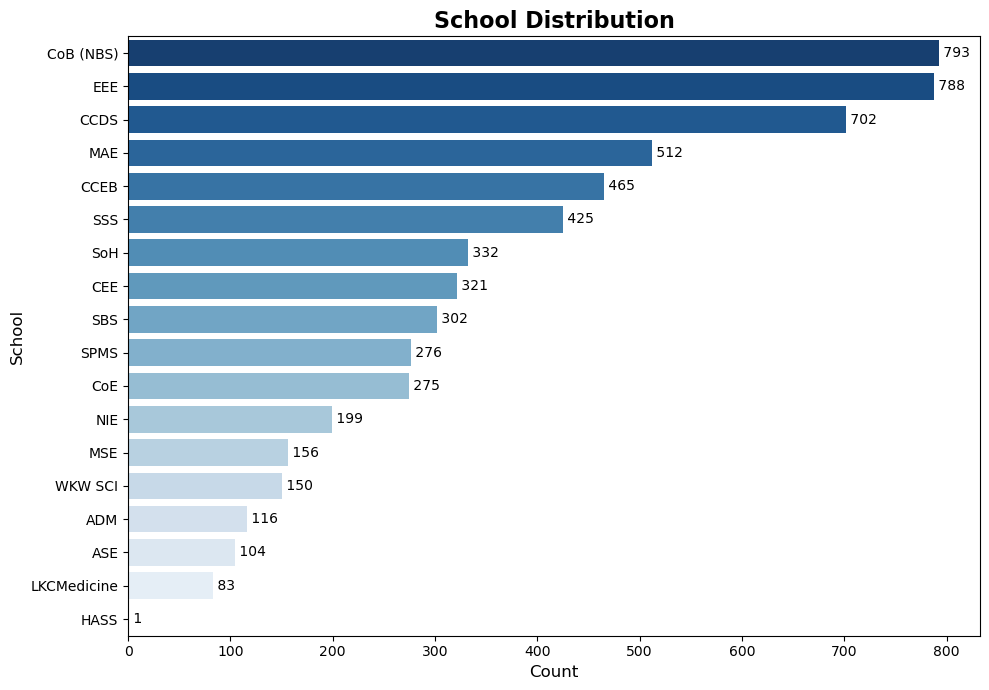

In [5]:
def school_distribution_one(data):

    school_counts = Counter([entry['School'] for entry in data])

    
    sorted_schools = school_counts.most_common()

    labels = [school[0] for school in sorted_schools]
    values = [school[1] for school in sorted_schools] 
        
        
    colors = sns.color_palette("Blues", len(values))[::-1] 
    
    
    plt.figure(figsize=(10, 7))
    sns.barplot(x=values, y=labels, palette=colors)


    plt.title('School Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('School', fontsize=12)


    for index, value in enumerate(values):
        plt.text(value, index, f' {value}', va='center')


    plt.tight_layout()
    plt.show()
    
    
    
# Calling the function
school_distribution_one(data)

### CGPA Distribution

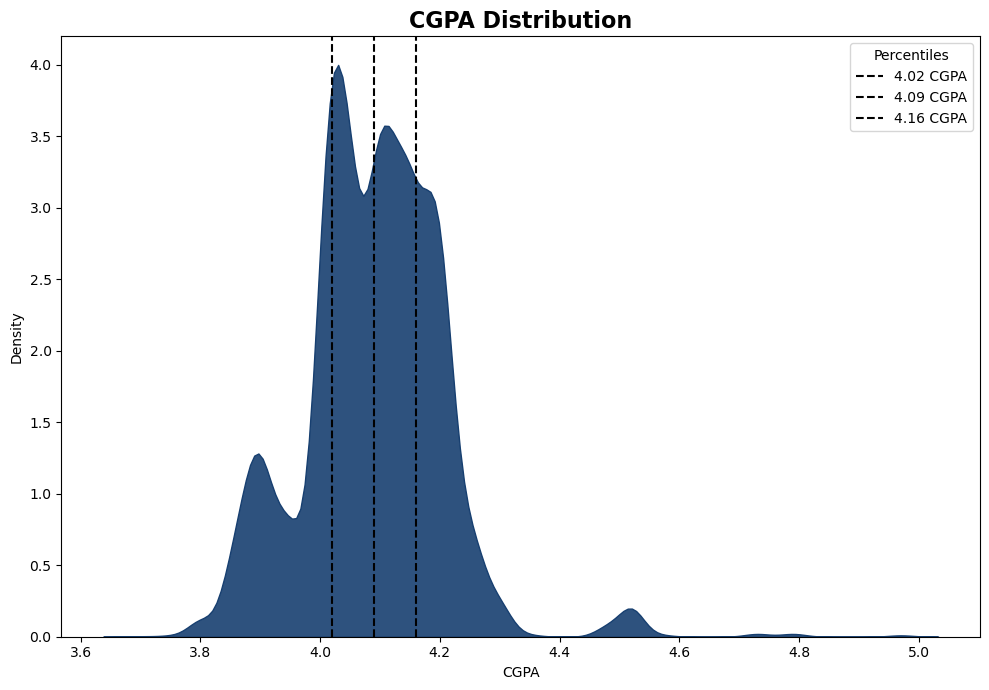

In [6]:
def calculate_percentiles(data, percentiles): # Calculating percentiles without numpy package, using sc2000
    
    sorted_data = sorted(data)
    results = []
    
    
    for i in percentiles:
        p = (i / 100) * (len(sorted_data) - 1)
        x = int(p)
        y = min(x + 1, len(sorted_data) - 1)
        results.append(sorted_data[x] + (sorted_data[x+1] - sorted_data[x]) * (p - y))
        
        
    return results




def cgpa_distribution_one(data):

    
    cgpa_values = [float(entry['CGPA']) for entry in data]


    percentiles = calculate_percentiles(cgpa_values, [25, 50, 75])


    plt.figure(figsize=(10, 7))
    sns.kdeplot(cgpa_values, color='#173F70', fill=True,alpha=0.9)


    for perc in percentiles:
        plt.axvline(perc, color='#000000', linestyle='--', label=f'{perc:.2f} CGPA')


    plt.title('CGPA Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('CGPA')
    plt.ylabel('Density')


    plt.legend(title='Percentiles')


    plt.tight_layout()
    plt.show()


    
#calling the function
cgpa_distribution_one(data)

## In-Depth Analysis of Tutorial Groups

### Gender Distribution

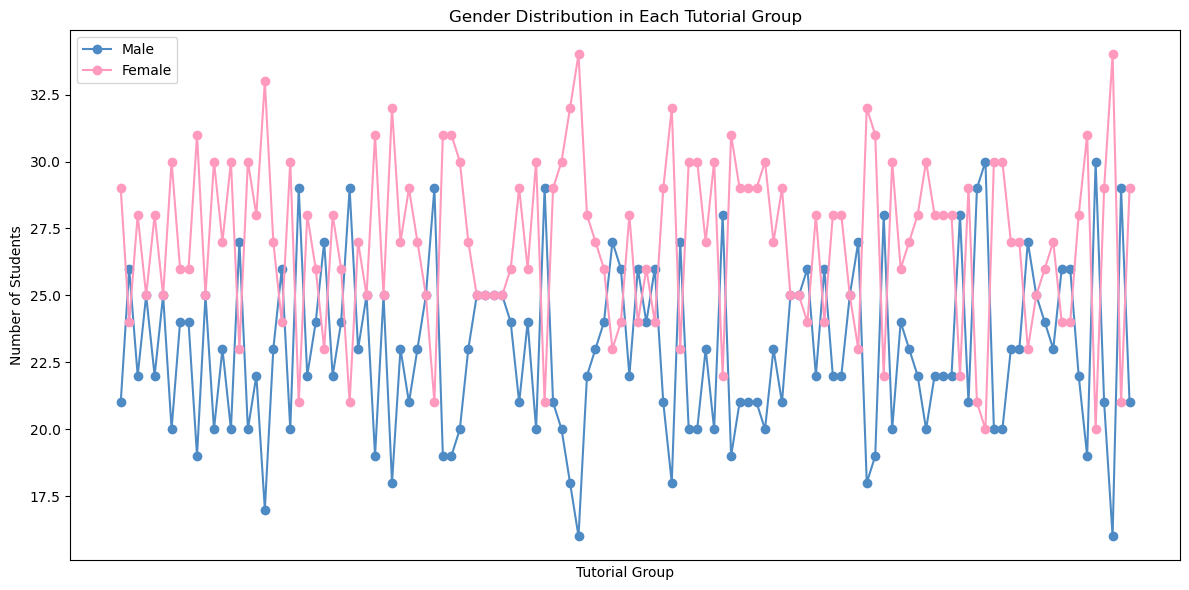

Tutorial group with the highest number of females: G-4 (34 females)
Tutorial group with the lowest number of females: G-83 (20 females)


Tutorial group with the highest number of males: G-83 (30 males)
Tutorial group with the lowest number of males: G-4 (16 males)


In [7]:
def gender_distribution_two(data):
    
    
    tutorial_groups = list(set(student['Tutorial Group'] for student in data))
    gender_distribution = {group: Counter() for group in tutorial_groups}
    
    for student in data:
        group = student['Tutorial Group']
        gender = student['Gender']
        gender_distribution[group][gender] += 1
    
    
    tutorial_groups_sorted = sorted(gender_distribution.keys()) 
    male_counts = [gender_distribution[group]['Male'] for group in tutorial_groups_sorted]
    female_counts = [gender_distribution[group]['Female'] for group in tutorial_groups_sorted]
    
    
    plt.figure(figsize=(12, 6))
    plt.plot(tutorial_groups_sorted, male_counts, label='Male', color='#4E8BC4', marker='o')
    plt.plot(tutorial_groups_sorted, female_counts, label='Female', color='#FF99BE', marker='o')
    plt.xlabel('Tutorial Group')
    plt.ylabel('Number of Students')
    plt.title('Gender Distribution in Each Tutorial Group')
    plt.xticks([]) 
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    max_females = max(female_counts)
    min_females = min(female_counts)
    max_males = max(male_counts)
    min_males = min(male_counts)
    
    
    max_female_group = tutorial_groups_sorted[female_counts.index(max_females)]
    min_female_group = tutorial_groups_sorted[female_counts.index(min_females)]
    max_male_group = tutorial_groups_sorted[male_counts.index(max_males)]
    min_male_group = tutorial_groups_sorted[male_counts.index(min_males)]
    
    
    print(f"Tutorial group with the highest number of females: {max_female_group} ({max_females} females)")
    print(f"Tutorial group with the lowest number of females: {min_female_group} ({min_females} females)")
    print()
    print()
    print(f"Tutorial group with the highest number of males: {max_male_group} ({max_males} males)")
    print(f"Tutorial group with the lowest number of males: {min_male_group} ({min_males} males)")
    
    
    
#calling the function
gender_distribution_two(data)  

### School Affiliation Distribution

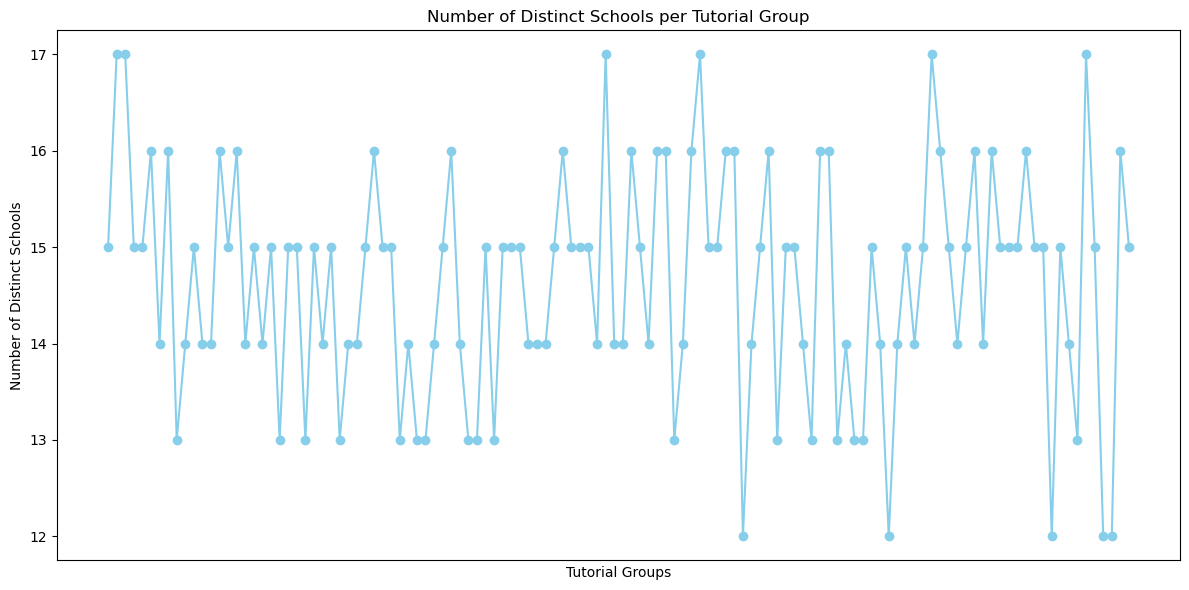

Average number of unique schools: 14
Mode number of distinct schools: 15
Highest number of distinct schools: 17
Lowest number of distinct schools: 12


In [8]:
def school_distribution_two(data):
    
    
    unique_schools_count = {}


    for student in data:
        group = student['Tutorial Group']
        school = student['School']
        
        if group not in unique_schools_count:
            unique_schools_count[group] = set() 
        
        unique_schools_count[group].add(school) 


        
    unique_school_counts = [len(schools) for schools in unique_schools_count.values()]
    
    

    tutorial_groups_sorted = sorted(unique_schools_count.keys())
    
    
    
    plt.figure(figsize=(12, 6))
    plt.plot(tutorial_groups_sorted, unique_school_counts, marker='o', color='skyblue')
    plt.xlabel('Tutorial Groups')
    plt.ylabel('Number of Distinct Schools')
    plt.title('Number of Distinct Schools per Tutorial Group')
    plt.xticks([]) 
    plt.tight_layout()
    plt.show()
    


    avg_unique_schools = sum(unique_school_counts) // len(unique_school_counts)
    max_unique_count = max(unique_school_counts)
    min_unique_count = min(unique_school_counts)
    counts = Counter(unique_school_counts)
    mode_unique_count = max(counts.items(), key=lambda x: x[1])[0]
    


    print(f"Average number of unique schools: {avg_unique_schools}")
    print(f"Mode number of distinct schools: {mode_unique_count}")
    print(f"Highest number of distinct schools: {max_unique_count}")
    print(f"Lowest number of distinct schools: {min_unique_count}")

    
    
# Calling the function
school_distribution_two(data)


### CGPA Distribution

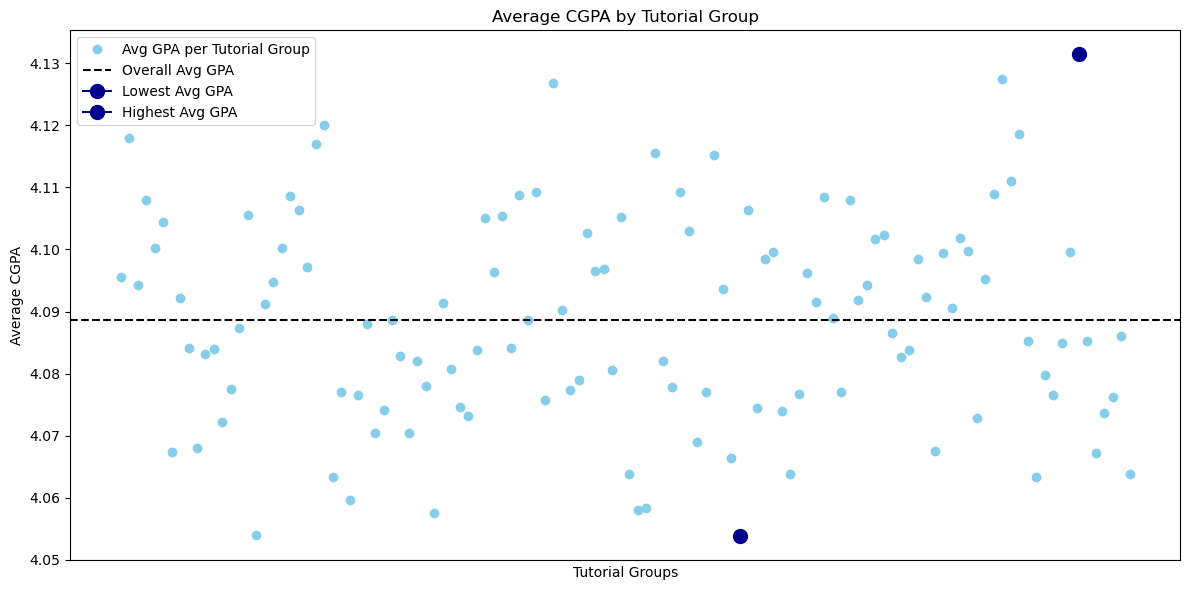

Overall average CGPA: 4.09


Highest average CGPA: 4.13
Lowest average CGPA: 4.05


Number of groups above average: 58
Number of groups below average: 62


In [9]:
def cgpa_distribution_two(data):

    
    gpa_counts = {}
    
    for student in data:
        group = student['Tutorial Group']
        gpa = float(student['CGPA'])  
        
        if group not in gpa_counts:
            gpa_counts[group] = []
        
        gpa_counts[group].append(gpa)


    tutorial_groups = list(gpa_counts.keys())
    average_gpas = [sum(gpas) / len(gpas) for gpas in gpa_counts.values()]


    overall_avg_gpa = sum(average_gpas) / len(average_gpas)


    max_avg_gpa = max(average_gpas)
    min_avg_gpa = min(average_gpas)


    above_avg_count = sum(1 for avg in average_gpas if avg > overall_avg_gpa)
    below_avg_count = sum(1 for avg in average_gpas if avg < overall_avg_gpa)



    plt.figure(figsize=(12, 6))
    plt.plot(tutorial_groups, average_gpas, marker='o', linestyle='', color='skyblue', label='Avg GPA per Tutorial Group')


    plt.axhline(y=overall_avg_gpa, color='black', linestyle='--', label='Overall Avg GPA')


    for i, avg in enumerate(average_gpas):
        if avg == max_avg_gpa:
            plt.plot(tutorial_groups[i], avg, marker='o', color='darkblue', markersize=10, label='Highest Avg GPA')
        elif avg == min_avg_gpa:
            plt.plot(tutorial_groups[i], avg, marker='o', color='darkblue', markersize=10, label='Lowest Avg GPA')


    plt.xlabel('Tutorial Groups')
    plt.ylabel('Average CGPA')
    plt.title('Average CGPA by Tutorial Group')
    plt.xticks([])
    plt.legend()
    plt.tight_layout()
    plt.show()


    print(f"Overall average CGPA: {overall_avg_gpa:.2f}")
    print()
    print()
    print(f"Highest average CGPA: {max_avg_gpa:.2f}")
    print(f"Lowest average CGPA: {min_avg_gpa:.2f}")
    print()
    print()
    print(f"Number of groups above average: {above_avg_count}")
    print(f"Number of groups below average: {below_avg_count}")

    
    

# Calling the function
cgpa_distribution_two(data)

### Gender Combination

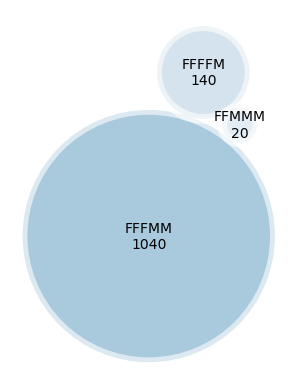

In [10]:
# Function to calculate gender distribution combinations
def gender_combi(student_records):
    all_gender_distributions = []
    tutorial_groups = set(s['Tutorial Group'] for s in student_records)

    for group_name in tutorial_groups:
        students = [s for s in student_records if s['Tutorial Group'] == group_name]
        males = [s for s in students if s['Gender'] == 'Male']
        females = [s for s in students if s['Gender'] == 'Female']

        num_males = len(males)
        num_females = len(females)

        # Construct gender combination using females first
        for i in range(10):  # Assuming 10 groups
            group = []
            group.extend(females[i * (num_females // 10): (i + 1) * (num_females // 10)])
            group.extend(males[i * (num_males // 10): (i + 1) * (num_males // 10)])

            while len(group) < 5:
                if len(females) > 0:
                    group.append(females.pop())
                elif len(males) > 0:
                    group.append(males.pop())

            # Create a combination string (F for Female, M for Male)
            combination = ''.join(sorted([student['Gender'][0] for student in group]))
            all_gender_distributions.append(combination)

    return all_gender_distributions



# Get gender combinations from the data
gender_combinations = gender_combi(data)

# Count the frequency of each gender combination
combination_counts = Counter(gender_combinations)

# No hard coding: use the counts and the actual dataset
radii = [math.sqrt(count) * 10 for count in combination_counts.values()]  # Calculate radii from counts
labels = list(combination_counts.keys())  # Get gender combination labels
counts = list(combination_counts.values())  # Get the counts


colors = ['#71A5C5', '#B8D1E1', '#D3E0ED']

# Circle packing class
class C:
    def __init__(self, r):
        self.N = len(r)
        # Initialize the circle positions and radii manually (no numpy)
        self.x = [[0, 0, radius] for radius in r]  # (x, y, radius)
        
        maxstep = 2 * max(r)  # Maximum step for initial placement
        length = math.ceil(math.sqrt(self.N))  # Grid length to place initial circles
        grid = [i * maxstep for i in range(int(length))]  # Create grid

        gx, gy = [], []
        for i in grid:
            for j in grid:
                gx.append(i)
                gy.append(j)

        for i in range(self.N):
            self.x[i][0] = gx[i]  # Set x positions
            self.x[i][1] = gy[i]  # Set y positions

        # Center the circles
        mean_x = sum([x[0] for x in self.x]) / self.N
        mean_y = sum([x[1] for x in self.x]) / self.N
        for i in range(self.N):
            self.x[i][0] -= mean_x
            self.x[i][1] -= mean_y

        self.step = min(r)  # Smallest step size based on smallest circle
        self.iter = 1.  # Iteration counter
        self.E = self.energy()  # Initial energy

    def minimize(self):
        while self.iter < 1000 * self.N:  # Run for a large number of iterations
            for i in range(self.N):
                rand = [random.uniform(-self.step, self.step) / self.iter for _ in range(2)]  # Random movement
                self.x[i][0] += rand[0]
                self.x[i][1] += rand[1]
                e = self.energy()  # Calculate energy
                if (e < self.E and self.isvalid(i)):  # Accept the move if it lowers energy and is valid
                    self.E = e  # Update energy
                    self.iter = 1.  # Reset iteration counter if a valid move is made
                else:
                    self.x[i][0] -= rand[0]  # Revert move if it doesn't work
                    self.x[i][1] -= rand[1]
                    self.iter += 1.  # Increase iteration count

    def energy(self):
        # Total energy is sum of squared distances
        return sum((x[0] ** 2 + x[1] ** 2) ** 2 for x in self.x)

    def distance(self, x1, x2):
        # Calculate the distance between two circles minus their radii
        return math.sqrt((x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2) - x1[2] - x2[2]

    def isvalid(self, i):
        # Check that circle i doesn't overlap with any other circle
        for j in range(self.N):
            if i != j:
                if self.distance(self.x[i], self.x[j]) < 0:
                    return False
        return True

    def plot(self, ax, labels=None, counts=None):
        # Plot circles
        for i in range(self.N):
            circ = plt.Circle((self.x[i][0], self.x[i][1]), self.x[i][2], facecolor=colors[i % len(colors)], 
                              alpha=0.6, edgecolor='white', linewidth=7)
            ax.add_patch(circ)
            if labels is not None and counts is not None:
                # Display label and count in the center of each circle
                ax.text(self.x[i][0], self.x[i][1], f'{labels[i]}\n{counts[i]}', ha='center', 
                        va='center', color='black', fontsize=10)

# Initialize and minimize positions
c = C(radii)
c.minimize()

# Plot the results
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
ax.axis("off")

# Call the plot function, passing labels and counts
c.plot(ax, labels=labels, counts=counts)
ax.relim()
ax.autoscale_view()
plt.show()


#### _______________________________________________________________________________________________________________________

# Algorithm Functions

#### _______________________________________________________________________________________________________________________

In [11]:
data = load(file_path)

### Counter Function

##### Count the occurrences of each item in an iterable and return the counts in a dictionary

In [12]:
def custom_counter(iterable):
    
    
    count_dictionary = {}
    
    
    for item in iterable:
        if item in count_dictionary:
            count_dictionary[item] += 1
        else:
            count_dictionary[item] = 1
            
            
    return count_dictionary

### School Affiliation Allocation

##### Balance school representation across groups

- Ensure every group has at least 4 unqiue groups. 
- It swaps the students, if a potential swap meets the diversity criteria

In [13]:
def school_affiliation(groups):
    
    for i, group in enumerate(groups):
        schools_in_group = set(student['School'] for student in group)
        
        if len(schools_in_group) < 4:

            for j in range(len(groups)):
                if i == j:
                    continue
                    
                group_j = groups[j]
                
                for student_i in group.copy():  
                    for student_j in group_j.copy(): 
                        
                        if student_i['Gender'] == student_j['Gender']:
                            
                            schools_i = set(s['School'] for s in group if s != student_i) | {student_j['School']}
                            schools_j = set(s['School'] for s in group_j if s != student_j) | {student_i['School']}
                            
                            counts_i = custom_counter(s['School'] for s in group if s != student_i)
                            counts_j = custom_counter(s['School'] for s in group_j if s != student_j)
                            counts_i[student_j['School']] = counts_i.get(student_j['School'], 0) + 1
                            counts_j[student_i['School']] = counts_j.get(student_i['School'], 0) + 1
                            
                            if (len(schools_i) >=4 and len(schools_j)>=4 and
                                max(counts_i.values()) <=2 and list(counts_i.values()).count(2) <=1 and
                                max(counts_j.values()) <=2 and list(counts_j.values()).count(2) <=1):
                 
                                idx_i = group.index(student_i)
                                idx_j = group_j.index(student_j)
                        
                                group[idx_i], group_j[idx_j] = student_j, student_i
                            
                                break
                    else:
                        continue
                    break
                    
    return groups

### New Column Range

##### Binning the CGPA Range to reduce cardinality

In [14]:
def assign_ranges(groups):
    
    students_sorted = sorted(groups, key=lambda x: -x['CGPA'])
    
    num_students = len(students_sorted)
    
    range_size = num_students // 5
    
    index = 0
    
    for r in range(1, 6):
        
        size = range_size
        
        for i in range(size):
            students_sorted[index]['Range'] = 'R' + str(r)
            index += 1
            
    return groups

#### _______________________________________________________________________________________________________________________

# Algorithm Tier 1 ( Assigning & Procesisng groups)

#### _______________________________________________________________________________________________________________________

##### Distribute students into balanced groups based on gender, CGPA and schools
- Organize students by gender and CGPA range (R1 to R5).
- Prioritize factors with lower cardinality (gender first, then CGPA, and lastly school affiliation). This ensures balance while managing the complexity
- Assign students to 10 groups based on gender and CGPA distribution.
- call shool_affiliation function to ensure balanced school representation

Prioritizing lower cardinality factors such as gender before higher cardinality factors like CGPA and school affiliation ensures that the grouping process is both efficient and balanced. By addressing gender first, the algorithm ensures the most fundamental level of diversity across teams. Next, it considers CGPA, which adds complexity due to the wider range of academic performance, and finally, it adjusts for school affiliation, which has the highest diversity and requires careful integration to avoid disrupting the previous balances. This approach streamlines the process by tackling simpler factors first, optimizing the overall efficiency and fairness of the grouping.

In [15]:
def process_groups(data):

    # Convert CGPA to float
    for student in data:
        student['CGPA'] = float(student['CGPA'])

    tutorial_groups = list(set(student['Tutorial Group'] for student in data))

    output_data = []

    for tutorial_group in tutorial_groups:
        students_in_tutorial = [student for student in data if student['Tutorial Group'] == tutorial_group]

        # Assign ranges
        students_in_tutorial = assign_ranges(students_in_tutorial)

        # Separate students by Range and Gender
        range_gender_dict = {}
        for r in ['R1', 'R2', 'R3', 'R4', 'R5']:
            range_gender_dict[r] = {'Male': [], 'Female': []}

        for student in students_in_tutorial:
            range_gender_dict[student['Range']][student['Gender']].append(student)


        for r in range_gender_dict:
            for gender in range_gender_dict[r]:
                range_gender_dict[r][gender].sort(key=lambda x: (x['CGPA'], x['Student ID']))


        num_groups_per_tutorial = 10
        group_size = 5

 
        total_males = sum(len(range_gender_dict[r]['Male']) for r in ['R1', 'R2', 'R3', 'R4', 'R5'])
        total_females = sum(len(range_gender_dict[r]['Female']) for r in ['R1', 'R2', 'R3', 'R4', 'R5'])


        base_males_per_group = total_males // num_groups_per_tutorial
        extra_males = total_males % num_groups_per_tutorial
        desired_males_per_group = [base_males_per_group + (1 if i < extra_males else 0) for i in range(num_groups_per_tutorial)]
        desired_females_per_group = [group_size - desired_males_per_group[i] for i in range(num_groups_per_tutorial)]


        groups = [[] for _ in range(num_groups_per_tutorial)]

        # Assign students to groups
        for group_index in range(num_groups_per_tutorial):
            group = []
            male_count = 0
            female_count = 0
            desired_male_count = desired_males_per_group[group_index]
            desired_female_count = desired_females_per_group[group_index]

            # For each Range R1 to R5, assign one student to the group
            for r in ['R1', 'R2', 'R3', 'R4', 'R5']:
                # Try to assign a male student if needed
                if male_count < desired_male_count and range_gender_dict[r]['Male']:
                    student = range_gender_dict[r]['Male'].pop(0)
                    male_count += 1

                elif female_count < desired_female_count and range_gender_dict[r]['Female']:
                    student = range_gender_dict[r]['Female'].pop(0)
                    female_count += 1

                else:
                    # If no students are left in this Range, try other Ranges
                    for other_r in ['R1', 'R2', 'R3', 'R4', 'R5']:
                        if other_r == r:
                            continue
                        if male_count < desired_male_count and range_gender_dict[other_r]['Male']:
                            student = range_gender_dict[other_r]['Male'].pop(0)
                            male_count += 1
                            break
                        elif female_count < desired_female_count and range_gender_dict[other_r]['Female']:
                            student = range_gender_dict[other_r]['Female'].pop(0)
                            female_count += 1
                            break
                    else:
                        continue
                group.append(student)

            groups[group_index] = group

        # Enforce school diversity within this tutorial group (assuming school_affiliation function exists)
        groups = school_affiliation(groups)

        # Save the groups for this tutorial group
        for idx, group in enumerate(groups):
            # Add group to output
            for student in group:
                output_data.append({
                    'Tutorial Group': tutorial_group,
                    'Student ID': student['Student ID'],
                    'School': student['School'],
                    'Name': student['Name'],
                    'Gender': student['Gender'],
                    'CGPA': student['CGPA'],
                    'Range': student['Range'],
                    'Team Assigned': idx + 1
                })

    return output_data



#calling the function
output_data = process_groups(data)

#### _______________________________________________________________________________________________________________________

#  Model Accuracy 

#### _______________________________________________________________________________________________________________________

### School Affiliation Scoring

##### Evaluate the diversity of schools within a group

Calculate score as the ratio of unique schools to the total number of students in a group.

In [16]:
def calculate_school_diversity(group):
    
    schools = [student['School'] for student in group]
    unique_schools = len(set(schools))
    diversity_score = unique_schools / len(group)
    
    
    return diversity_score

### CGPA Scoring

##### Evaluate diversity of CGPAs within a group

Consider both CGPA distribution and the number of distinct CGPA ranges
- If there are exactly 3 distinct CGPA ranges, we assign according to standard deviation of CGPA in the group.
- If there are more or fewer than 3 ranges, CGPA diversity score is computed as the ratio of distinct ranges to the number of studnets in a group

In [17]:
def calculate_cgpa_diversity(group):

    cgpas = [float(student['CGPA']) for student in group]


    group_ranges = [student['Range'] for student in group]
    distinct_ranges = len(set(group_ranges))
    
    if distinct_ranges == 3:
        mean_cgpa = np.mean(cgpas)
        std_dev_cgpa = np.std(cgpas)
        
            
        if std_dev_cgpa <= 0.03:
            distributed_score = 0.6
        else:
            distributed_score = 0.8

        diversity_score = max(distributed_score, distinct_ranges / 5)
        
    else:
        diversity_score = distinct_ranges / 5
    
    return diversity_score

### Overall Diversity Score

##### Take the average of the school and CGPA diversity score

In [18]:
def calculate_overall_diversity(school_diversity, gpa_diversity):

    return (school_diversity + gpa_diversity) / 2


### Accuracy

##### Determine the percenatge of groups classified as diverse

Count the number of groups with a diversity score >= 0.8 and compute the percentage of diverse group to total groups.

In [19]:
def calculate_accuracy(overall_diversity_scores):
    
    
    total_groups = len(overall_diversity_scores)
    accurate_groups = sum(1 for score in overall_diversity_scores if score >= 0.8)
    print('Number of Groups that are classified as diverse:', accurate_groups)
    accuracy_percentage = (accurate_groups / total_groups) * 100
    
    
    
    return accuracy_percentage

### Model Performance 

##### Evaluate the diversity of student groupings and determine if further model enhancement is needed

- For each group, compute the overall diversity scores based on school and CGPA and the percentage of diverse group( >=0.8 overall diversity).
- If percentage accuracy exceeds 99.5%, no model enhancement is needed.

In [20]:
def model_analysis(output_data):
    
    
    grouped_data = {}
    school_diversity_scores = []
    cgpa_diversity_scores = []
    overall_diversity_scores = []
    
    Advance_model = True
 
    

    for student in output_data:
        group_key = (student['Tutorial Group'], student['Team Assigned'])
        
        
        if group_key not in grouped_data:
            grouped_data[group_key] = []
        grouped_data[group_key].append(student)
        

    for group in grouped_data.values():
        school_diversity = calculate_school_diversity(group)
        cgpa_diversity = calculate_cgpa_diversity(group)
        overall_diversity = calculate_overall_diversity(school_diversity, cgpa_diversity)
        

        school_diversity_scores.append(school_diversity)
        cgpa_diversity_scores.append(cgpa_diversity)
        overall_diversity_scores.append(overall_diversity)
    

    accuracy_percentage = calculate_accuracy(overall_diversity_scores)
    print(f"Percentage of Model Threshold: {accuracy_percentage:.2f}%")
    
    
    if accuracy_percentage > 99.5:
        Advance_model = False
        
    

    return school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores, Advance_model



# calling the function
school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores, Advance_model = model_analysis(output_data)

Number of Groups that are classified as diverse: 1181
Percentage of Model Threshold: 98.42%


#### _______________________________________________________________________________________________________________________

# Model Analysis

#### _______________________________________________________________________________________________________________________

### School Diversity

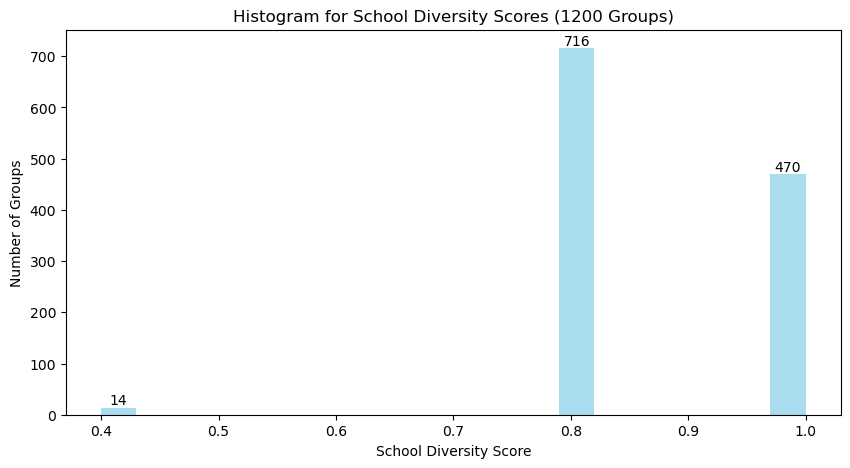

In [21]:
def school_diversity(school_diversity_scores):

    plt.figure(figsize=(10, 5))
    counts, bins, patches = plt.hist(school_diversity_scores, bins=20, color='skyblue', alpha=0.7)


    for count, bin_ in zip(counts, bins):
        if count > 0:  
            plt.text(bin_ + (bins[1] - bins[0]) / 2, count, int(count), ha='center', va='bottom')

            
    plt.title('Histogram for School Diversity Scores (1200 Groups)')
    plt.xlabel('School Diversity Score')
    plt.ylabel('Number of Groups')
    plt.show()


#calling the function
school_diversity(school_diversity_scores)

### CGPA diversity

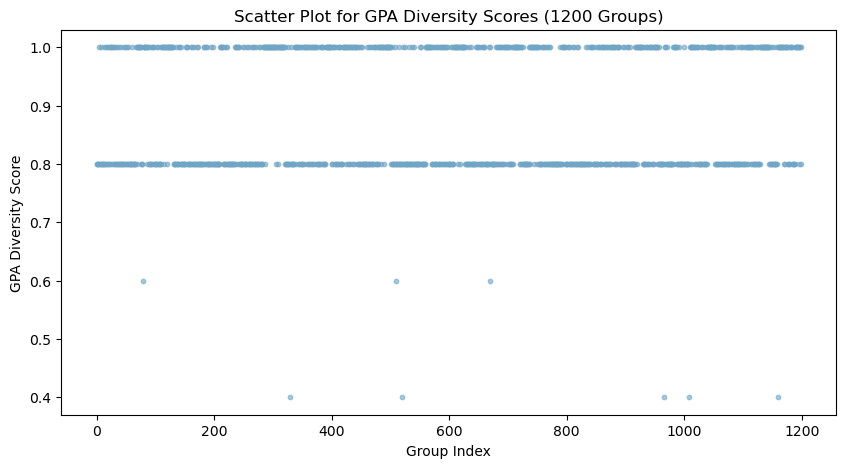

In [22]:
def cgpa_diversity_score(cgpa_diversity_scores):

    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(cgpa_diversity_scores)), cgpa_diversity_scores, s=10, color='#71A5C5', alpha=0.6) 
    plt.title('Scatter Plot for GPA Diversity Scores (1200 Groups)')
    plt.xlabel('Group Index')
    plt.ylabel('GPA Diversity Score')
    plt.show()
    
    
#calling the function
cgpa_diversity_score(cgpa_diversity_scores)

### Model Performance

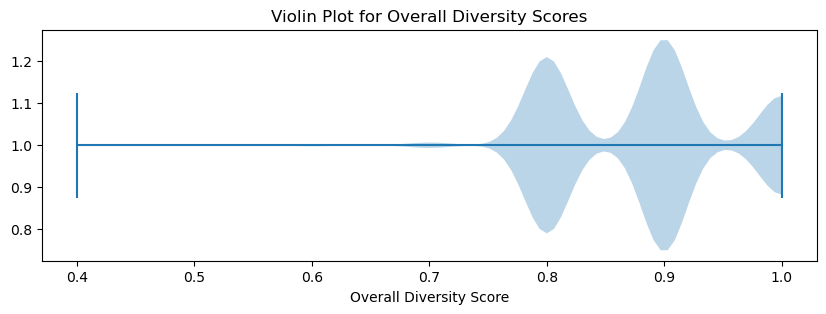

In [23]:
def diversity_score(overall_diversity_scores):
    
    plt.figure(figsize=(10, 3))
    plt.violinplot(overall_diversity_scores, vert=False)
    plt.title('Violin Plot for Overall Diversity Scores')
    plt.xlabel('Overall Diversity Score')
    plt.show()
    
    
#calling the fucntion
diversity_score(overall_diversity_scores)

#### _______________________________________________________________________________________________________________________

# Algorithm Tier 2 (Enhance Balancing)

#### _______________________________________________________________________________________________________________________

Tier 2 of the algorithm focuses on further enhancing the balance and accuracy of the team formations. In this layer, the algorithm swaps students between schools and CGPA ranges to improve the overall distribution. By making these swaps, it ensures a more even representation of school affiliation and academic performance (CGPA) across teams, ultimately leading to better-balanced groups. This step aims to refine the initial groupings from Tier 1, optimizing the accuracy of the balance and fairness metrics while ensuring diverse and equitable teams.

### Balancing School Diversity

##### Swap student in groups to achieve better school diversity

- Categorize students into two lists: 'low' for groups with school diversity scores below 0.8, and 'high' for groups with scores 0.8 or above.
- Swapping students of the same gender and gpa range from the low and high diveristy group to better achieve school diversity score for both sides.

In [24]:
def balance_school_diversity(groups):
    LOW = []
    HIGH = []


    for idx, group in enumerate(groups):
        diversity_score = calculate_school_diversity(group)
        if diversity_score < 0.8:
            LOW.append((idx, group)) 
        elif diversity_score == 1 or diversity_score == 0.8:
            HIGH.append((idx, group))

            
    for low_idx, low_group in LOW:
        swap_found = False  
        
        for student_low in low_group:
            low_school = student_low['School']
            low_gender = student_low['Gender']
            low_gpa_range = student_low['Range']
            low_group_number = student_low['Team Assigned']


            for high_idx, high_group in HIGH:
                for student_high in high_group:
                    high_school = student_high['School']
                    high_gender = student_high['Gender']
                    high_gpa_range = student_high['Range']
                    high_group_number = student_high['Team Assigned']


                    if low_gender == high_gender and low_gpa_range == high_gpa_range:

                        temp_low_group = low_group.copy()
                        temp_high_group = high_group.copy()

                        # Perform swap in the temp groups
                        temp_low_group.remove(student_low)
                        temp_low_group.append(student_high)
                        temp_high_group.remove(student_high)
                        temp_high_group.append(student_low)

                        # Calculate new diversity scores for the temp groups
                        new_low_diversity_score = calculate_school_diversity(temp_low_group)
                        new_high_diversity_score = calculate_school_diversity(temp_high_group)

                        # Calculate GPA diversity score for both groups
                        new_low_gpa_diversity = calculate_cgpa_diversity(temp_low_group)
                        new_high_gpa_diversity = calculate_cgpa_diversity(temp_high_group)

                        # Check if the diversity scores meet the criteria
                        if new_low_diversity_score >= 0.6 and new_high_diversity_score >= 0.8 and new_low_gpa_diversity >= 0.8:
                    
                            low_group.remove(student_low)
                            low_group.append(student_high)
                            high_group.remove(student_high)
                            high_group.append(student_low)
                            
                            student_low['Team Assigned'] = high_group_number
                            student_high['Team Assigned'] = low_group_number
                                
                            swap_found = True
                            break 

                if swap_found:
                    break


    return groups  


### Balancing CGPA Diversity

##### Swap students to achieve better CGPA diversity

- Categorize students into two lists: 'low' for groups with cgpa diversity scores below 0.8, and 'high' for groups with scores 0.8 or above.
- Swapping students of the same gender from the low and high diveristy group to better achieve cgpa diversity score for both side without affecting school diversity score.

In [25]:
def balance_cgpa_diversity(groups):
    LOW = []
    HIGH = []


    for idx, group in enumerate(groups):
        
        cgpa_diversity_score = calculate_cgpa_diversity(group)
        
        if cgpa_diversity_score <= 0.6:
            LOW.append((idx, group, cgpa_diversity_score)) 
            
        elif cgpa_diversity_score >= 0.8:
            HIGH.append((idx, group))


    LOW.sort(key=lambda x: x[2])


    for low_idx, low_group, initial_low_score in LOW:
        swap_found = False 
        initial_score = calculate_cgpa_diversity(low_group)

        for student_low in low_group:
            low_cgpa_range = student_low['Range']
            low_gender = student_low['Gender']
            low_school = student_low['School']
            low_group_number = student_low['Team Assigned']


            for high_idx, high_group in HIGH:
                for student_high in high_group:
                    high_cgpa_range = student_high['Range']
                    high_gender = student_high['Gender']
                    high_school = student_high['School']
                    high_group_number = student_high['Team Assigned']


                    if low_gender == high_gender:

                        temp_low_group = low_group.copy()
                        temp_high_group = high_group.copy()

                        # Perform swap in the temp groups
                        temp_low_group.remove(student_low)
                        temp_low_group.append(student_high)
                        temp_high_group.remove(student_high)
                        temp_high_group.append(student_low)

      
                        new_low_cgpa_diversity = calculate_cgpa_diversity(temp_low_group)
                        new_high_cgpa_diversity = calculate_cgpa_diversity(temp_high_group)

                 
                        new_low_school_diversity = calculate_school_diversity(temp_low_group)
                        new_high_school_diversity = calculate_school_diversity(temp_high_group)

                      
                        if new_high_cgpa_diversity >= 0.8 and new_high_school_diversity >= 0.8:
                            required_low_cgpa_diversity = initial_score
                            
                            if new_low_cgpa_diversity >= required_low_cgpa_diversity and new_low_school_diversity >= 0.8:
                       
                                low_group.remove(student_low)
                                low_group.append(student_high)
                                high_group.remove(student_high)
                                high_group.append(student_low)
                                
                                student_low['Team Assigned'] = high_group_number
                                student_high['Team Assigned'] = low_group_number
                                
                                swap_found = True
                                break 

                if swap_found:
                    break


    return groups  

### Get students by Team Assigned

##### Organise students into groups based on their assigned team numbers

In [26]:
def group_students_by_group_number(students):
    
    
    grouped_data = {}
    for student in students:
        group_number = student['Team Assigned']
        if group_number not in grouped_data:
            grouped_data[group_number] = []
        grouped_data[group_number].append(student)
        
        
    return grouped_data

### Enhance Model

##### Refine group assignment based on school and CGPA diversity

To achieve better outcomes, this function is executed iteratively 5 times, providing more opportunities to shuffle students and refine the balance, leading to improved diversity and a more accurate final result.

In [27]:
def Enhance_model(data):
   
    tutorial_groups = list(set(student['Tutorial Group'] for student in data))

    balanced_output_data = []


    for tutorial_group in tutorial_groups:
        students_in_tutorial = [student for student in data if student['Tutorial Group'] == tutorial_group]

      
        grouped_data = group_students_by_group_number(students_in_tutorial)

   
        groups = list(grouped_data.values())
        
        for _ in range(5):
            
            balanced_groups_school = balance_school_diversity(groups)
            balanced_groups = balance_cgpa_diversity(balanced_groups_school)

 
        for group_index, group in enumerate(balanced_groups):
            for student in group:
                balanced_output_data.append({
                    'Tutorial Group': student['Tutorial Group'],
                    'Student ID': student['Student ID'],
                    'School': student['School'],
                    'Name': student['Name'],
                    'Gender': student['Gender'],
                    'CGPA': student['CGPA'],
                    'Range': student['Range'],
                    'Team Assigned': group_index + 1
                })


    school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores, Advance_model = model_analysis(balanced_output_data)


    
    return school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores, balanced_output_data


if Advance_model == True:
    school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores, balanced_output_data = Enhance_model(output_data)


Number of Groups that are classified as diverse: 1199
Percentage of Model Threshold: 99.92%


#### _______________________________________________________________________________________________________________________

# Enhance Model Analysis

#### _______________________________________________________________________________________________________________________

### School Diversity

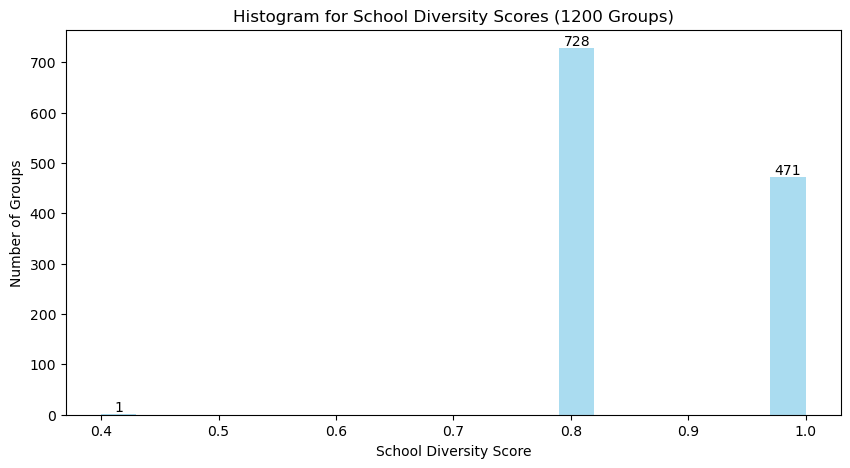

In [28]:
school_diversity(school_diversity_scores)

### CGPA Diversity

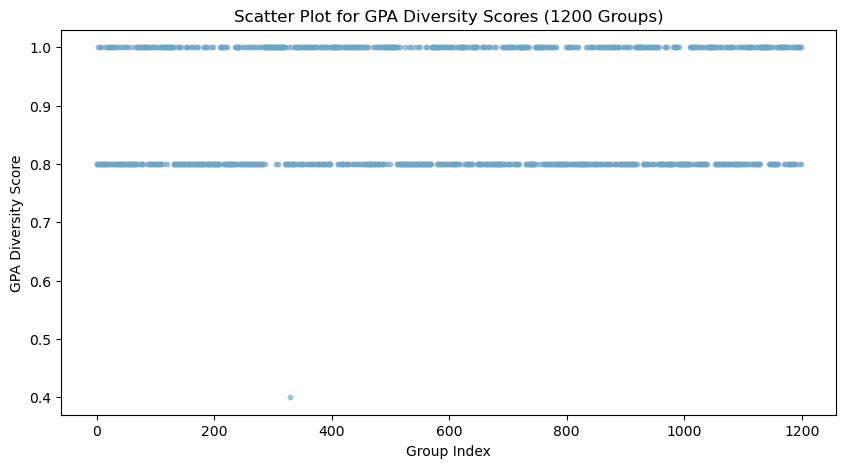

In [29]:
cgpa_diversity_score(cgpa_diversity_scores)

### Model Performance

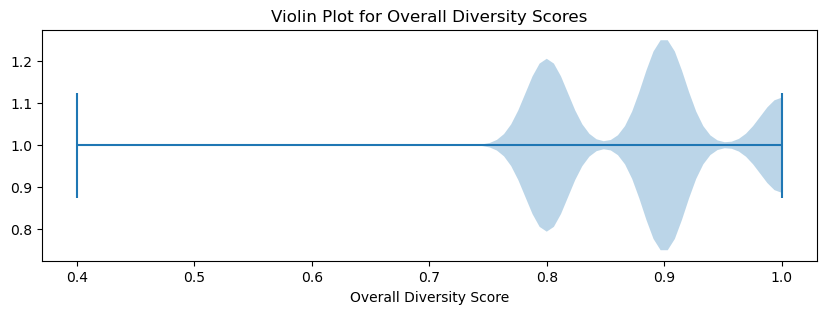

In [30]:
diversity_score(overall_diversity_scores)

#### _______________________________________________________________________________________________________________________

# Algorithm Tier 3 (Oulier)

#### _______________________________________________________________________________________________________________________

Tier 3 addresses outliers in the model. Every dataset or model can have outliers that may affect the overall balance. This function identifies and handles those outliers, ensuring they don't disrupt the accuracy or fairness of the groupings. By mitigating the impact of outliers, it helps maintain consistent and reliable results across all teams.

### Get students by Group Number

##### Organise students into groups based on their assigned team numbers

In [31]:
def group_students_by_group_number(students):
    
    
    group_numbers = set(student['Team Assigned'] for student in students)
    grouped_students = []
    for group_number in group_numbers:
        group = [student for student in students if student['Team Assigned'] == group_number]
        grouped_students.append(group)
        
    return grouped_students

### Outlier Model

##### Outlier Model

Tier 3 performs the same function as Tier 2's school balancing but relaxes the CGPA requirement. After performing the swap between low and high diversity groups, it temporarily allows a looser CGPA constraint. Once the swap is done, it calls back the Tier 2 CGPA balancing function to enforce the original CGPA distribution constraints. This approach works by re-swapping groups, creating space for outliers to fit more effectively within the groups, improving overall team balance and ensuring constraints are still met.

In [32]:
 def outlier_model(data):
   
    tutorial_groups = list(set(student['Tutorial Group'] for student in data))
    balanced_output_data = []

  
    for tutorial_group in tutorial_groups:

        students_in_tutorial = [student for student in data if student['Tutorial Group'] == tutorial_group]

   
        grouped_data = group_students_by_group_number(students_in_tutorial)

      
        low_school_diversity_groups = []
        high_school_diversity_groups = []


        for group in grouped_data:
            school_diversity_score = calculate_school_diversity(group)
            if school_diversity_score <= 0.6:
                low_school_diversity_groups.append(group)
            elif school_diversity_score >= 0.6:
                high_school_diversity_groups.append(group)

    
        for low_group in low_school_diversity_groups:
            initial_low_school_diversity = calculate_school_diversity(low_group)
            swap_found = False

            for student_low in low_group:
                low_gender = student_low['Gender']
                low_cgpa = float(student_low['CGPA'])
                low_school = student_low['School']
                low_group_number = student_low['Team Assigned']

                # Iterate through high diversity groups
                for high_group in high_school_diversity_groups:
                    for student_high in high_group:
                        high_gender = student_high['Gender']
                        high_cgpa = float(student_high['CGPA'])
                        high_school = student_high['School']
                        high_group_number = student_high['Team Assigned']

                        # easy of the CGPA
                        if low_gender == high_gender and abs(low_cgpa - high_cgpa) <= 0.03:
   
                            temp_low_group = low_group.copy()
                            temp_high_group = high_group.copy()

                            temp_low_group.remove(student_low)
                            temp_low_group.append(student_high)
                            temp_high_group.remove(student_high)
                            temp_high_group.append(student_low)

                            new_low_school_diversity = calculate_school_diversity(temp_low_group)
                            new_high_school_diversity = calculate_school_diversity(temp_high_group)

                     
                            if (new_low_school_diversity > initial_low_school_diversity or new_low_school_diversity == 0.8) and new_high_school_diversity >= 0.8:
                        
                                low_group.remove(student_low)
                                low_group.append(student_high)
                                high_group.remove(student_high)
                                high_group.append(student_low)

                   
                                student_low['Team Assigned'] = high_group_number
                                student_high['Team Assigned'] = low_group_number

                                swap_found = True
                                break  

                    if swap_found:
                        break  

            # Now Balance CGPA
            grouped_data = balance_cgpa_diversity(grouped_data)

        # Flatten the grouped data before adding it to the balanced output data
        balanced_output_data.extend([student for group in grouped_data for student in group])

    return balanced_output_data



final_balanced_data = outlier_model(balanced_output_data)

In [33]:
school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores, Advance_model = model_analysis(final_balanced_data)

Number of Groups that are classified as diverse: 1200
Percentage of Model Threshold: 100.00%


### Our model has achieved 100% accuracy, meaning that all the groups have been correctly classified. This indicates that there is good diversity across all three categories (gender, CGPA, and school affiliation) in every group.





#### _______________________________________________________________________________________________________________________

# Final Model Analysis

#### _______________________________________________________________________________________________________________________

### School Diversity

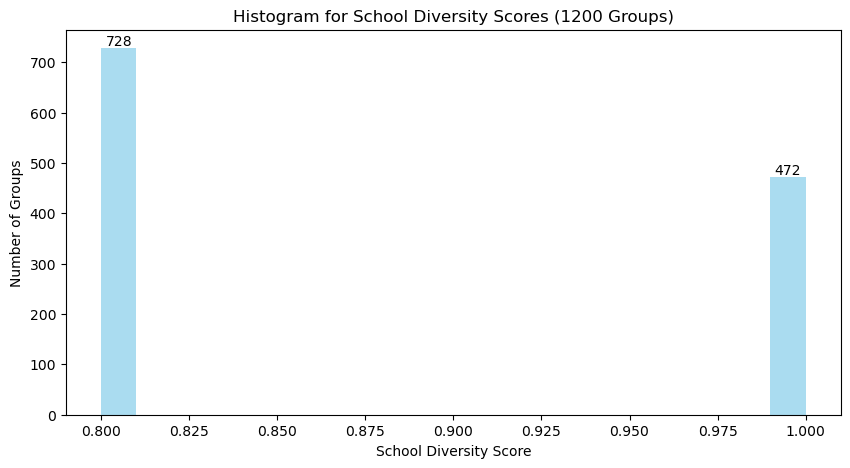

In [34]:
school_diversity(school_diversity_scores)

### CGPA Diversity

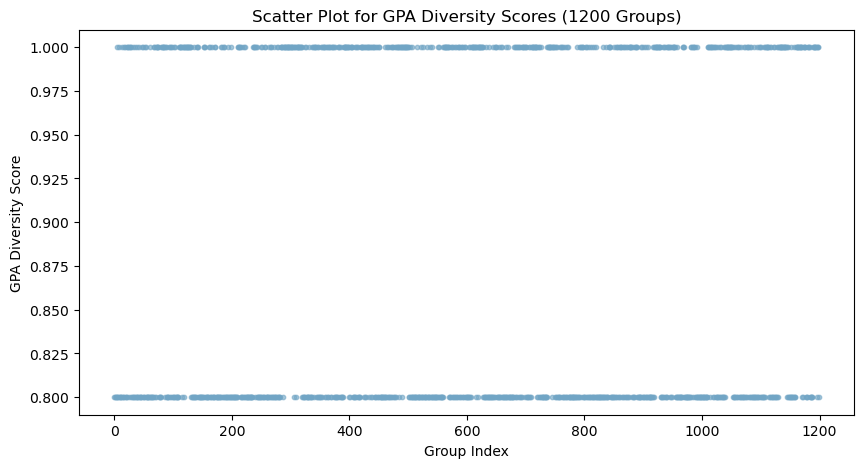

In [35]:
cgpa_diversity_score(cgpa_diversity_scores)

### Model Performance

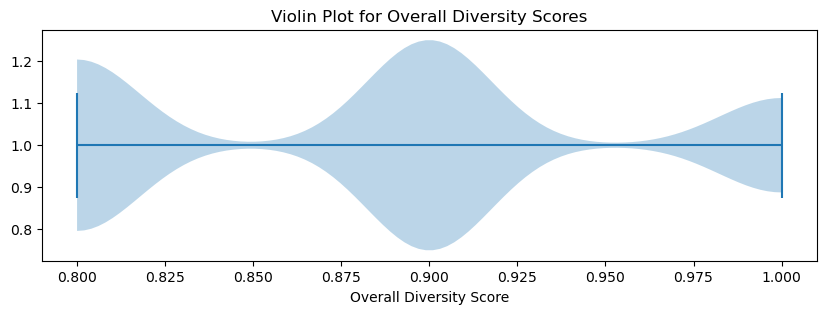

In [36]:
diversity_score(overall_diversity_scores)

#### _______________________________________________________________________________________________________________________

# Saving Output

#### _______________________________________________________________________________________________________________________

In [37]:
def print_thank_you():
    ascii_art = pyfiglet.figlet_format("Thank You !", font="slant") 
    print(ascii_art)

In [38]:
def save_to_csv(output_data, file_path):

    fieldnames = ['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA', 'Team Assigned'] 
    

    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
        writer.writeheader()
        

        for row in output_data:
            modified_row = {
                'Tutorial Group': row['Tutorial Group'],
                'Student ID': row['Student ID'],
                'School': row['School'],
                'Name': row['Name'],
                'Gender': row['Gender'],
                'CGPA': row['CGPA'],
                'Team Assigned': row['Team Assigned']  # Renaming Group Number to Team Assigned
            }
            writer.writerow(modified_row)
            
    print("File have been saved")
    print_thank_you()


save_to_csv(balanced_output_data, output_file_path)


File have been saved
  ________                __      __  __               __
 /_  __/ /_  ____ _____  / /__    \ \/ /___  __  __   / /
  / / / __ \/ __ `/ __ \/ //_/     \  / __ \/ / / /  / / 
 / / / / / / /_/ / / / / ,<        / / /_/ / /_/ /  /_/  
/_/ /_/ /_/\__,_/_/ /_/_/|_|      /_/\____/\__,_/  (_)   
                                                         



#### _______________________________________________________________________________________________________________________

# Additional Requirements 🏆🏆🏆

#### _______________________________________________________________________________________________________________________

##### The objective is to form diverse and balanced teams by ensuring a mix of school affiliations, genders, and CGPA levels, for a team between 4 -10 students


#### _______________________________________________________________________________________________________________________

# Load Dataset

#### _______________________________________________________________________________________________________________________

In [39]:
# Declare file path, change it accordingly.
file_path = 
output_file_path = 

In [40]:
def load(file_path):
    
    data = []
    
    
    with open(file_path, 'r') as file:
        header = file.readline().strip().split(',')
        for line in file:
            row = line.strip().split(',')
            entry = {} 
            
            for i in range(len(header)): 
                entry[header[i]] = row[i] 
            data.append(entry)
            
    return data



# load the csv file
data = load(file_path)

In [41]:
advance_data = load(file_path)

#### _______________________________________________________________________________________________________________________

# Advance Algorithm Function

#### _______________________________________________________________________________________________________________________

In [42]:
GROUP_SIZE = 10

### Gender Encoding

In [43]:
def gender_assignment(gender_str):
    
    gender_str = str(gender_str).strip().lower()
    if gender_str in ['female', 'f']:
        return 'F'
    elif gender_str in ['male', 'm']:
        return 'M' 

### Grouping Combinations

This function adjusts the distribution of group sizes.

For each group size, it returns a list of group sizes that balances the number of larger and smaller groups.
The distribution varies, with specific combinations of sizes

In [44]:
def groups_combo(group_size):
    
    if group_size == 4:
        return [5]*2 + [4]*10
    elif group_size == 5:
        return [5]*10
    elif group_size == 6:
        return [7]*2 + [6]*6
    elif group_size == 7:
        return [8]*1 + [7]*6
    elif group_size == 8:
        return [9]*2 + [8]*4
    elif group_size == 9:
        return [9]*2 + [8]*4
    elif group_size == 10:
        return [10]*5

### School Constraints

In [45]:
def get_school_constraints(group_size):
    
    if group_size == 4:
        return {'min_distinct_schools': 4, 'max_per_school': 1, 'max_schools_repeated': 0}
    elif group_size == 5:
        return {'min_distinct_schools': 4, 'max_per_school': 2, 'max_schools_repeated': 1}
    elif group_size == 6:
        return {'min_distinct_schools': 5, 'max_per_school': 2, 'max_schools_repeated': 1}
    elif group_size in [7,8]:
        return {'min_distinct_schools': 5, 'max_per_school': 3, 'max_schools_repeated': 1}
    elif group_size in [10]:
        return {'min_distinct_schools': 5, 'max_per_school': 3, 'max_schools_repeated': 1}
    elif group_size in [10]:
        return {'min_distinct_schools': 5, 'max_per_school': 2, 'max_schools_repeated': 2}


#### _______________________________________________________________________________________________________________________

# Advance Algorithm Tier 1 ( Assigning & Procesisng groups)

#### _______________________________________________________________________________________________________________________

The Tier 1 , layer 1 function, groups students into the desired team size while ensuring gender diversity by distributing male and female students evenly across teams. Additionally, GPA diversity is maintained by sorting students based on CGPA and spreading them across groups. This approach effectively balances both gender and academic performance within each team, ensuring fair and diverse team compositions.

In [46]:
def assign_students_to_groups(tutorial_group_data, group_size):

    male_students = [s for s in tutorial_group_data if s['Gender'] == 'M']
    female_students = [s for s in tutorial_group_data if s['Gender'] == 'F']

    
    num_males = len(male_students)
    num_females = len(female_students)

    
    total_students = num_males + num_females
    
    group_sizes = groups_combo(group_size)
    num_groups = len(group_sizes)
    
    # Adjust the number of groups based on total students
    expected_total = sum(group_sizes)
  
    group_ids = [f"Team {i+1}" for i in range(num_groups)]
    

    genders_count = [('M', num_males), ('F', num_females)]
    genders_sorted = sorted(genders_count, key=lambda x: -x[1])
    majority_gender = genders_sorted[0][0]
    minority_gender = genders_sorted[1][0] if genders_sorted[1][1] > 0 else genders_sorted[2][0]
    

    gender_pointers = {'M': 0, 'F': 0}
    

    male_students_sorted = sorted(male_students, key=lambda x: float(x['CGPA']))
    female_students_sorted = sorted(female_students, key=lambda x: float(x['CGPA']))
    
    students_by_gender = {
        'M': male_students_sorted,
        'F': female_students_sorted
    }
    
    # Initialize groups
    groups = [{'id': group_ids[i], 'size': group_sizes[i], 'students': []} for i in range(num_groups)]
    
    #  majority gender 
    for group in groups:
        if gender_pointers[majority_gender] < len(students_by_gender[majority_gender]):
            student = students_by_gender[majority_gender][gender_pointers[majority_gender]]
            group['students'].append(student)
            gender_pointers[majority_gender] += 1
    
    # Alternate genders 
    max_group_size = max(group_sizes)
    for i in range(1, max_group_size):
        for group in groups:
            if len(group['students']) < group['size']:
          
                last_gender = group['students'][-1]['Gender']
                next_gender = minority_gender if last_gender == majority_gender else majority_gender
        
                if gender_pointers[next_gender] < len(students_by_gender[next_gender]):
                    student = students_by_gender[next_gender][gender_pointers[next_gender]]
                    group['students'].append(student)
                    gender_pointers[next_gender] += 1
                    
                else:
                    if gender_pointers[last_gender] < len(students_by_gender[last_gender]):
                        student = students_by_gender[last_gender][gender_pointers[last_gender]]
                        group['students'].append(student)
                        gender_pointers[last_gender] += 1
                   
                    else:
                        # All have been assigned
                        break
    
    # Assign any remaining students
    for gender in ['M', 'F']:
        while gender_pointers[gender] < len(students_by_gender[gender]):
            student = students_by_gender[gender][gender_pointers[gender]]
            # Assign to group with space
            for group in groups:
                if len(group['students']) < group['size']:
                    group['students'].append(student)
                    break
            gender_pointers[gender] += 1
    
    # Verify if all students have been assigned
    assigned_students = sum(len(group['students']) for group in groups)
    if assigned_students != total_students:
        print(f"ERROR: Not all students have been assigned in Tutorial Group {tutorial_group_data[0]['Tutorial Group']}")
    
    return groups

In [47]:
def advance_requirement_process(data, group_size):
    for student in data:
        student['Gender'] = gender_assignment(student['Gender'])


    tutorial_groups = list(set(student['Tutorial Group'] for student in data))

    advance_data = []


    group_size = group_size  


    for tg in tutorial_groups:
        tg_data = [student for student in data if student['Tutorial Group'] == tg]
        groups = assign_students_to_groups(tg_data, group_size)


        for group in groups:
            for student in group['students']:
                row = {
                    'Tutorial Group': tg,
                    'Student ID': student['Student ID'],
                    'School': student['School'],
                    'Name': student['Name'],
                    'Gender': student['Gender'],
                    'CGPA': student['CGPA'],
                    'Team Assigned': group['id']
                }
                advance_data.append(row)
                
    return advance_data

In [48]:
advance_data = advance_requirement_process(advance_data, GROUP_SIZE)

#### _______________________________________________________________________________________________________________________

# Model Accurancy

#### _______________________________________________________________________________________________________________________

### School Affiliation Scoring

In [49]:
def calculate_school_diversity(group):


    schools = [student['School'] for student in group]
    unique_schools = len(set(schools))
    group_size = len(group)
    

    if group_size == 4:
        min_distinct_schools = 4
        max_per_school = 1  # No school should have more than 1 student
        max_schools_repeated = 0  # No repeated schools allowed
    elif group_size == 5:
        min_distinct_schools = 4
        max_per_school = 2  
        max_schools_repeated = 1  
    elif group_size == 6:
        min_distinct_schools = 5
        max_per_school = 2
        max_schools_repeated = 1
    elif group_size in [7, 8]:
        min_distinct_schools = 5
        max_per_school = 3
        max_schools_repeated = 1
    elif group_size in [9]:
        min_distinct_schools = 5
        max_per_school = 3
        max_schools_repeated = 1
    elif group_size in [10]:
        min_distinct_schools = 5
        max_per_school = 2
        max_schools_repeated = 2
    
    # Count how many times each school is repeated in the group
    school_counts = {school: schools.count(school) for school in set(schools)}
    
    # Calculate number of repeated schools
    repeated_schools = sum(1 for count in school_counts.values() if count > 1)
    
    # Calculate how much the group exceeds max_per_school
    excess_per_school = sum(max(0, count - max_per_school) for count in school_counts.values())
    
    # Calculate how much the group exceeds max_schools_repeated
    excess_repeated_schools = max(0, repeated_schools - max_schools_repeated)
    
    # Calculate the initial diversity score based on unique schools
    if unique_schools >= min_distinct_schools and all(count <= max_per_school for count in school_counts.values()) and repeated_schools <= max_schools_repeated:
        diversity_score = 1.0  # Perfect diversity score
    else:
        diversity_score = unique_schools / group_size 
    

    diversity_score -= 0.1 * excess_per_school
    

    diversity_score -= 0.1 * excess_repeated_schools
    
    diversity_score = max(diversity_score, 0)
    
    
    
    return round(diversity_score, 1)

### CGPA Diversity

In [50]:
def calculate_cgpa_diversity(group):

    cgpas = [float(student['CGPA']) for student in group]
    

    cgpas = np.sort(cgpas)
    n = len(cgpas)
    
    #  Gini coefficient
    mean_cgpa = np.mean(cgpas)
    gini_numerator = 0
    for i in range(n):
        for j in range(n):
            gini_numerator += abs(cgpas[i] - cgpas[j])
    gini = gini_numerator / (2 * n**2 * mean_cgpa)
    
    # Calculate diversity as 1 - Gini
    diversity_score = 1 - gini
    

    return round(diversity_score, 1)

### Overall Diversity

In [51]:
def calculate_overall_diversity(school_diversity, cgpa_diversity):

    return (school_diversity + cgpa_diversity) / 2

### Accuracy

In [52]:
def calculate_accuracy(overall_diversity_scores, threshold):
    total_groups = len(overall_diversity_scores)
    accurate_groups = sum(1 for score in overall_diversity_scores if score >= threshold)
    print('Number of Groups that are classified as diverse:', accurate_groups,'/',total_groups)
    accuracy_percentage = (accurate_groups / total_groups) * 100
    
    
    
    return accuracy_percentage

### Model Performance

In [53]:
def model_analysis(output_data):
    
    
    grouped_data = {}
    school_diversity_scores = []
    cgpa_diversity_scores = []
    overall_diversity_scores = []
    
    Advance_model = True
    threshold = 0.80
    

    for student in output_data:
        group_key = (student['Tutorial Group'], student['Team Assigned'])
        
        
        if group_key not in grouped_data:
            grouped_data[group_key] = []
        grouped_data[group_key].append(student)
        

    for group in grouped_data.values():
        school_diversity = calculate_school_diversity(group)
        cgpa_diversity = calculate_cgpa_diversity(group)
        overall_diversity = calculate_overall_diversity(school_diversity, cgpa_diversity)
        

        school_diversity_scores.append(school_diversity)
        cgpa_diversity_scores.append(cgpa_diversity)
        overall_diversity_scores.append(overall_diversity)
    

    accuracy_percentage = calculate_accuracy(overall_diversity_scores, threshold)
    print(f"Percentage of Model Threshold: {accuracy_percentage:.2f}%")
    
        
    

    return school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores



# calling the function
school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores = model_analysis(advance_data)

Number of Groups that are classified as diverse: 413 / 600
Percentage of Model Threshold: 68.83%


#### _______________________________________________________________________________________________________________________

#  Model Analysis

#### _______________________________________________________________________________________________________________________

### School Diversity

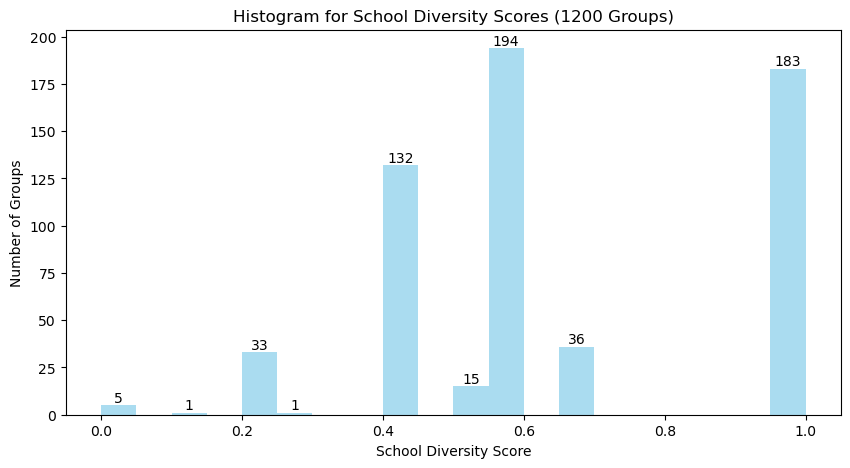

In [54]:
school_diversity(school_diversity_scores)

### CGPA Diversity

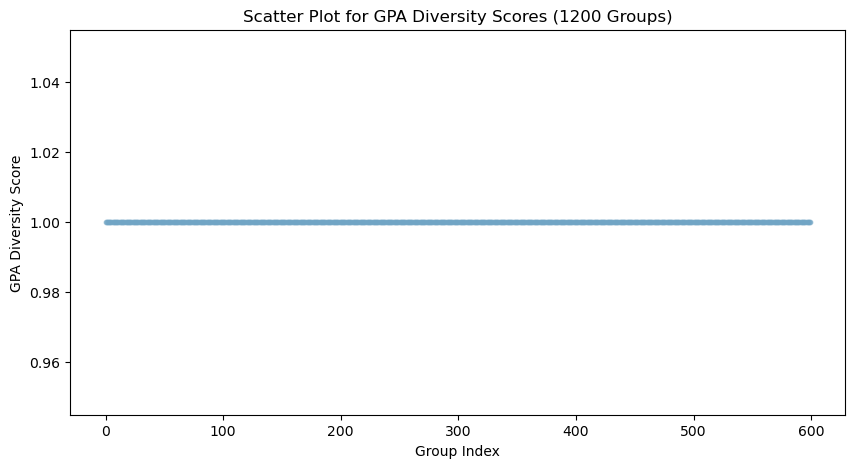

In [55]:
cgpa_diversity_score(cgpa_diversity_scores)

### Model Performance

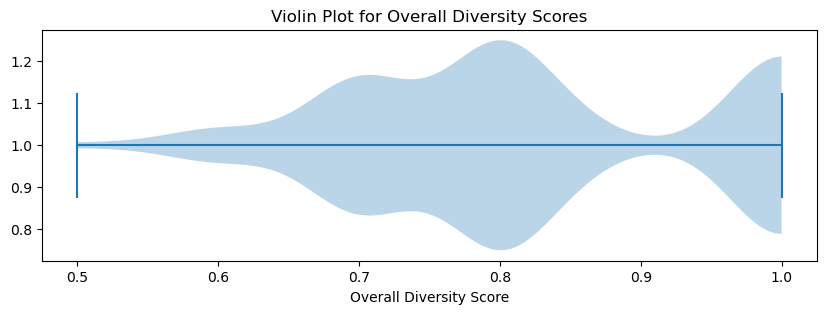

In [56]:
diversity_score(overall_diversity_scores)

#### _______________________________________________________________________________________________________________________

# Advance Algorithm Tier 2 (Enhance Balancing)

#### _______________________________________________________________________________________________________________________

Tier 2 focuses on balancing school diversity while maintaining the well-distributed GPA diversity achieved in the previous step. It categorizes teams into two lists: low school diversity and high school diversity. The algorithm performs student swaps between these lists to improve the school diversity score of the low-diversity teams. During this process, the high-diversity teams retain their ideal diversity and accuracy, ensuring that the GPA distribution remains well-balanced in both teams. This approach optimizes for better school representation without compromising the accuracy of GPA diversity.

### Get Students by Team Assigned

In [57]:
def group_students_by_group_number(students):
    
    
    grouped_data = {}
    for student in students:
        group_number = student['Team Assigned']
        if group_number not in grouped_data:
            grouped_data[group_number] = []
        grouped_data[group_number].append(student)
        
        
    return grouped_data

### Balancing School Diversity

In [58]:
def balance_school_diversity(groups):
    LOW = []
    HIGH = []


    for idx, group in enumerate(groups):
        diversity_score = calculate_school_diversity(group)
        if diversity_score < 0.8:
            LOW.append((idx, group)) 
        elif diversity_score >= 0.8:
            HIGH.append((idx, group))
    

    if not LOW:
        return groups


    for low_idx, low_group in LOW:
        initial_low_school_diversity = calculate_school_diversity(low_group)
        swap_found = False  

        for student_low in low_group:
            low_school = student_low['School']
            low_gender = student_low['Gender']
            low_group_number = student_low['Team Assigned']

            for high_idx, high_group in HIGH:
                for student_high in high_group:
                    high_school = student_high['School']
                    high_gender = student_high['Gender']
                    high_group_number = student_high['Team Assigned']

                  
                    temp_low_group = low_group.copy()
                    temp_high_group = high_group.copy()

            
                    temp_low_group.remove(student_low)
                    temp_low_group.append(student_high)
                    temp_high_group.remove(student_high)
                    temp_high_group.append(student_low)

                  
                    new_low_diversity_score = calculate_school_diversity(temp_low_group)
                    new_high_diversity_score = calculate_school_diversity(temp_high_group)

                
                    new_low_gpa_diversity = calculate_cgpa_diversity(temp_low_group)
                    new_high_gpa_diversity = calculate_cgpa_diversity(temp_high_group)

      
                    if new_low_diversity_score > initial_low_school_diversity and new_high_diversity_score >= 0.8 and new_low_gpa_diversity >= 0.8 and new_high_gpa_diversity >= 0.8 and low_gender == high_gender :
                        low_group.remove(student_low)
                        low_group.append(student_high)
                        high_group.remove(student_high)
                        high_group.append(student_low)

                  
                        student_low['Team Assigned'] = high_group_number
                        student_high['Team Assigned'] = low_group_number

                        swap_found = True
                        break 

                if swap_found:
                    break

        if swap_found:
            break

    return groups


### Enhance Model

In [59]:
def Enhance_model(data):
   
    tutorial_groups = list(set(student['Tutorial Group'] for student in data))

    balanced_output_data = []


    for tutorial_group in tutorial_groups:
        students_in_tutorial = [student for student in data if student['Tutorial Group'] == tutorial_group]

      
        grouped_data = group_students_by_group_number(students_in_tutorial)

   
        groups = list(grouped_data.values())
        
        for _ in range(5):
            
            balanced_groups = balance_school_diversity(groups)

 
        for group_index, group in enumerate(balanced_groups):
            for student in group:
                balanced_output_data.append({
                    'Tutorial Group': student['Tutorial Group'],
                    'Student ID': student['Student ID'],
                    'School': student['School'],
                    'Name': student['Name'],
                    'Gender': student['Gender'],
                    'CGPA': student['CGPA'],
                    'Team Assigned': student['Team Assigned']
                })


    school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores= model_analysis(balanced_output_data)


    
    return school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores, balanced_output_data





school_diversity_scores, cgpa_diversity_scores, overall_diversity_scores, balanced_output_data = Enhance_model(advance_data)


Number of Groups that are classified as diverse: 529 / 600
Percentage of Model Threshold: 88.17%


#### _______________________________________________________________________________________________________________________

# Model Analysis

#### _______________________________________________________________________________________________________________________

### School Diversity

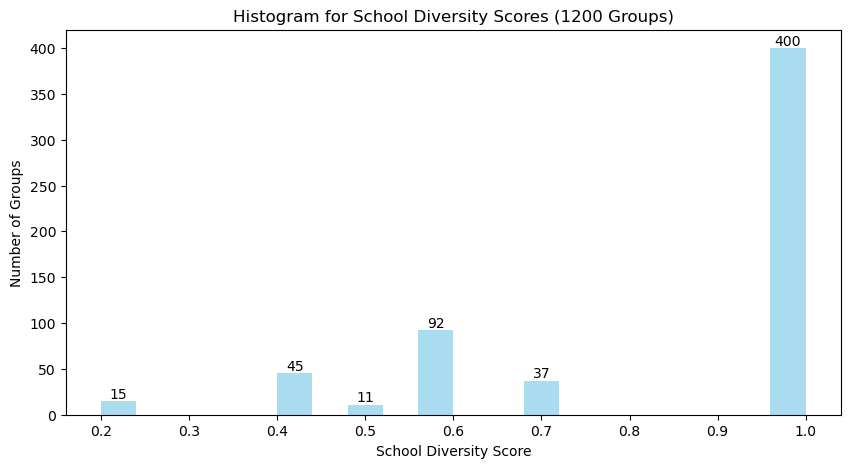

In [60]:
school_diversity(school_diversity_scores)

### CGPA Diversity

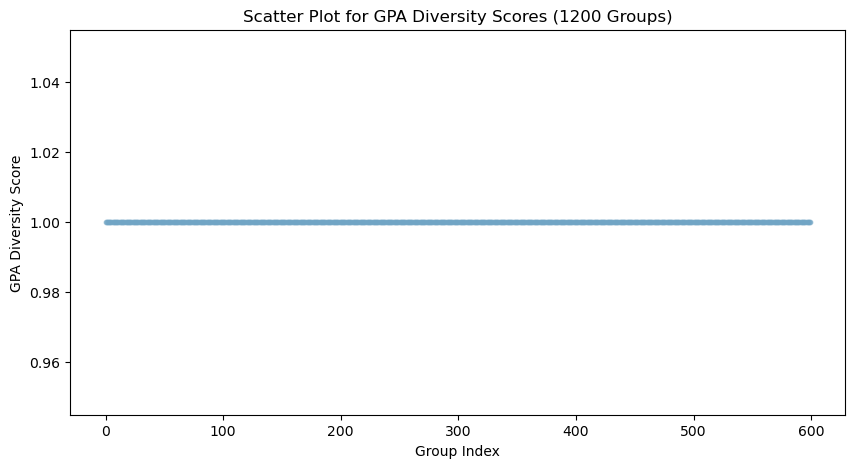

In [61]:
cgpa_diversity_score(cgpa_diversity_scores)

<h3 id="Model-Analysis-Model-Performance">Model Performance</h3>

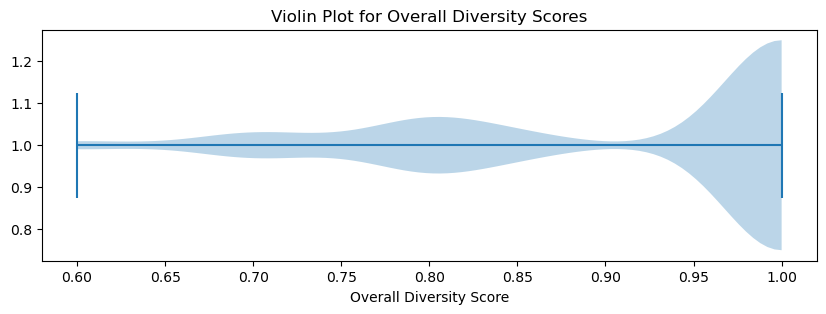

In [62]:
diversity_score(overall_diversity_scores)

### Overall Diversity Analysis

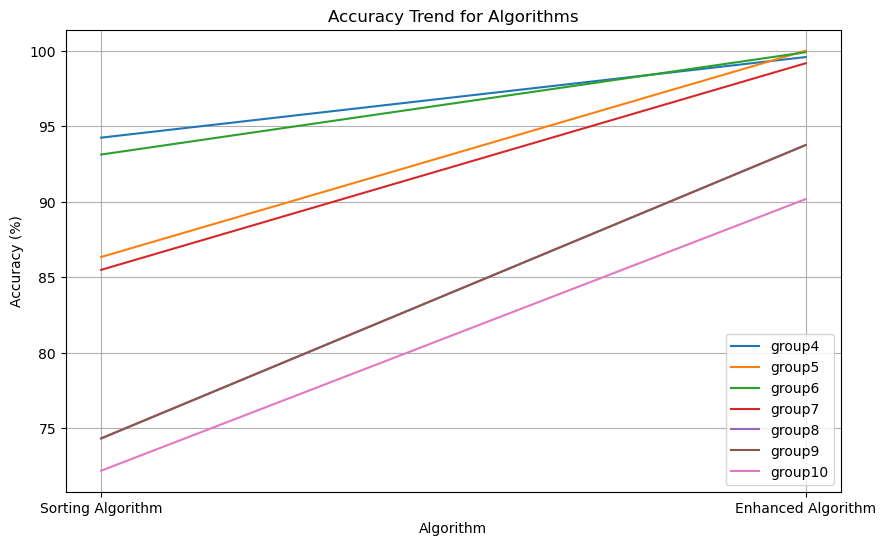

In [63]:

data = [
   {'algorithm': 'Sorting Algorithm', 'group4': 94.24, 'group5': 86.33, 'group6': 93.12, 'group7': 85.48, 'group8': 74.31, 'group9': 74.31, 'group10': 72.17},
   {'algorithm': 'Enhanced Algorithm', 'group4': 99.58, 'group5': 100.00, 'group6': 99.90, 'group7': 99.17, 'group8': 93.75, 'group9': 93.75, 'group10': 90.17}
]

fig, ax = plt.subplots(figsize=(10, 6))

x = [d['algorithm'] for d in data]
for i, group in enumerate(['group4', 'group5', 'group6', 'group7', 'group8', 'group9', 'group10']):
   y = [d[group] for d in data]
   ax.plot(x, y, label=group)

ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Trend for Algorithms')
ax.legend()
plt.grid()
plt.show()

#### _______________________________________________________________________________________________________________________

# Saving Output

#### _______________________________________________________________________________________________________________________

In [64]:
save_to_csv(advance_data, output_file_path)

File have been saved
  ________                __      __  __               __
 /_  __/ /_  ____ _____  / /__    \ \/ /___  __  __   / /
  / / / __ \/ __ `/ __ \/ //_/     \  / __ \/ / / /  / / 
 / / / / / / /_/ / / / / ,<        / / /_/ / /_/ /  /_/  
/_/ /_/ /_/\__,_/_/ /_/_/|_|      /_/\____/\__,_/  (_)   
                                                         



# Code with ❤️ and Python 🐍 By Jyoshika⭐